# Kidney Stone Prediction

[Follow Here](https://www.kaggle.com/competitions/playground-series-s3e12/overview)

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Explore Dataset

### Read Dataset

In [2]:
data_path = './data/input/'
train_df = pd.read_csv(data_path + 'train.csv', index_col=0)
test_df = pd.read_csv(data_path + 'test.csv', index_col=0)

### Investigate Datatype

*All columns are of numerical datatype and no categorical values. We are required to predict target class (target variable) and the target are encoded as numerical in source dataset.*

In [3]:
train_df.dtypes

gravity    float64
ph         float64
osmo         int64
cond       float64
urea         int64
calc       float64
target       int64
dtype: object

In [4]:
test_df.dtypes

gravity    float64
ph         float64
osmo         int64
cond       float64
urea         int64
calc       float64
dtype: object

### Check for missing values

*No missing values*

In [5]:
train_df.isna().sum()

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

In [6]:
test_df.isna().sum()

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
dtype: int64

### Summary Satistics


**Target class:** *Equally Distributed*

**Normalization:** *Normalize Feature Values*

In [7]:
train_df.describe()

,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [8]:
test_df.describe()

,gravity,ph,osmo,cond,urea,calc
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,1.018330,5.939312,654.891304,21.886594,280.985507,4.076848
std,0.006569,0.607143,236.361932,7.346069,134.877856,3.088524
min,1.005000,4.900000,187.000000,5.100000,64.000000,0.170000
25%,1.014000,5.530000,456.000000,17.400000,168.500000,1.527500
50%,1.019000,5.730000,658.000000,23.600000,282.000000,3.230000
75%,1.023250,6.210000,843.250000,27.600000,385.000000,5.540000
max,1.034000,7.940000,1236.000000,38.000000,620.000000,14.340000


## Train Test Split and Normalization

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = train_df.iloc[:, :6]
y = train_df.iloc[:, -1]
X = X.drop('ph', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)

# normalize
norm = MinMaxScaler()
norm.fit(X_train)

X_train = norm.transform(X_train)
X_test = norm.transform(X_test)

## Plot

### Distributions & outliers

<Axes: >

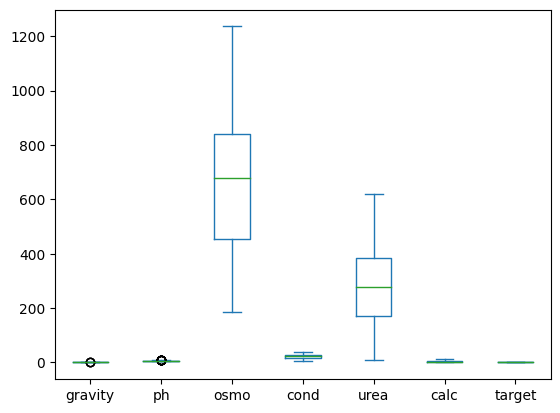

In [10]:
train_df.plot.box()

<Axes: >

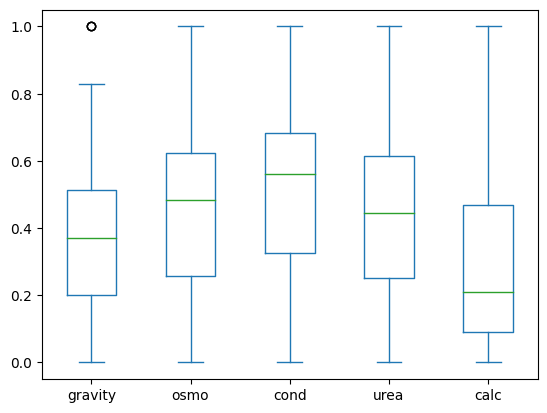

In [11]:
pd.DataFrame(data=X_train, columns=X.columns).plot.box()

<Axes: >

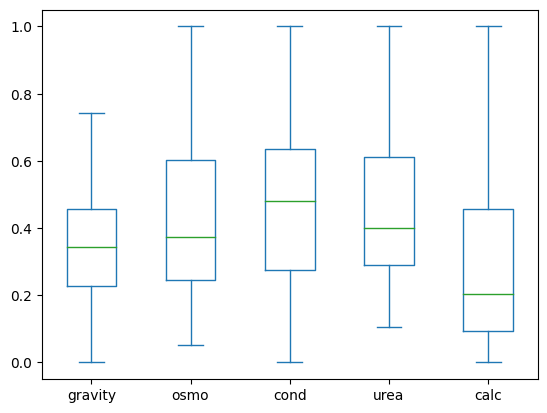

In [12]:
pd.DataFrame(data=X_test, columns=X.columns).plot.box()

<Axes: ylabel='Density'>

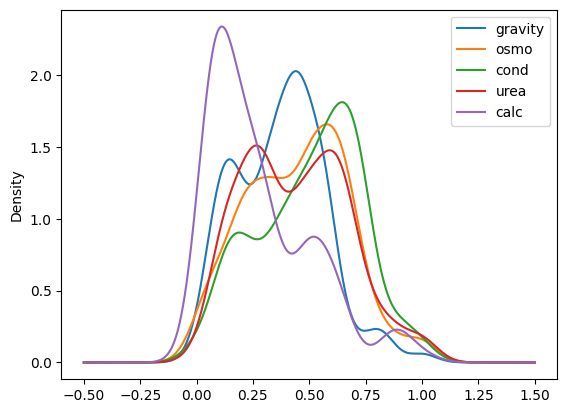

In [13]:
pd.DataFrame(data=X_train, columns=X.columns).plot.density()

<Axes: ylabel='Density'>

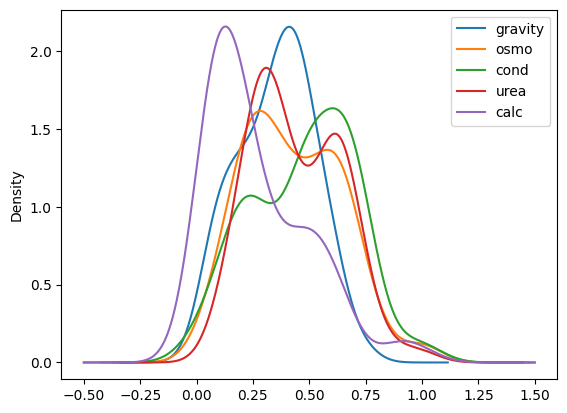

In [14]:
pd.DataFrame(data=X_test, columns=X.columns).plot.density()

In [15]:
corr = train_df.corr('pearson')
corr.style.background_gradient(cmap='coolwarm')

,gravity,ph,osmo,cond,urea,calc,target
gravity,1.000000,-0.290349,0.692317,0.470433,0.631710,0.494304,0.282577
ph,-0.290349,1.000000,-0.309495,-0.190185,-0.279749,-0.214402,-0.094983
osmo,0.692317,-0.309495,1.000000,0.708480,0.809880,0.472114,0.244770
cond,0.470433,-0.190185,0.708480,1.000000,0.499109,0.330609,0.172224
urea,0.631710,-0.279749,0.809880,0.499109,1.000000,0.489879,0.265211
calc,0.494304,-0.214402,0.472114,0.330609,0.489879,1.000000,0.467439
target,0.282577,-0.094983,0.244770,0.172224,0.265211,0.467439,1.000000


## Model Training and Validation

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from time import sleep


def performance_metrics(model, X, y, model_name):
    y_pred = model.predict(X)
    print(f"------------------- {model_name} -------------------")
    print(f"------------------- CLASSIFICATION REPORT -------------------")
    print(classification_report(y, y_pred))

    y_pred_prob = model.predict_proba(X)[:,1]
    auc = roc_auc_score(y, y_pred_prob)

    print(f"AUROC: {auc}")

    print(f"------------------- CONFUSION MATRIX -------------------")
    ConfusionMatrixDisplay(confusion_matrix(y, y_pred)).plot()

### Logistic Regression

------------------- LogisticRegression - Train -------------------
------------------- CLASSIFICATION REPORT -------------------
              precision    recall  f1-score   support

           0       0.71      0.82      0.76       182
           1       0.73      0.60      0.66       149

    accuracy                           0.72       331
   macro avg       0.72      0.71      0.71       331
weighted avg       0.72      0.72      0.71       331

AUROC: 0.780809794232613
------------------- CONFUSION MATRIX -------------------


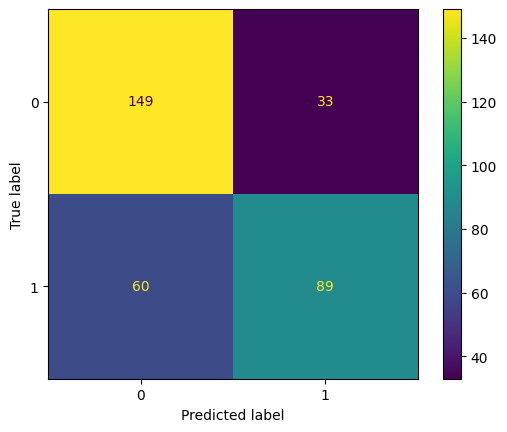

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2', max_iter = 1000)
lr.fit(X_train, y_train)

performance_metrics(lr, X_train, y_train, 'LogisticRegression - Train')

------------------- LogisticRegression - Test -------------------
------------------- CLASSIFICATION REPORT -------------------
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        48
           1       0.73      0.63      0.68        35

    accuracy                           0.75        83
   macro avg       0.74      0.73      0.73        83
weighted avg       0.75      0.75      0.74        83

AUROC: 0.8166666666666667
------------------- CONFUSION MATRIX -------------------


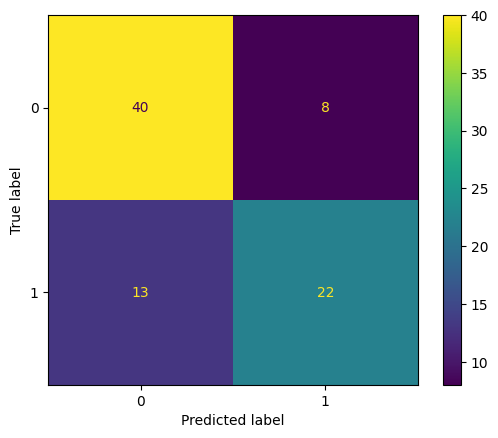

In [18]:
performance_metrics(lr, X_test, y_test, 'LogisticRegression - Test')

### Ensemble - RandomForestClassifier

------------------- RandomForestClassifier - Train -------------------
------------------- CLASSIFICATION REPORT -------------------
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       182
           1       0.79      0.70      0.74       149

    accuracy                           0.78       331
   macro avg       0.78      0.77      0.77       331
weighted avg       0.78      0.78      0.78       331

AUROC: 0.8645180323032673
------------------- CONFUSION MATRIX -------------------


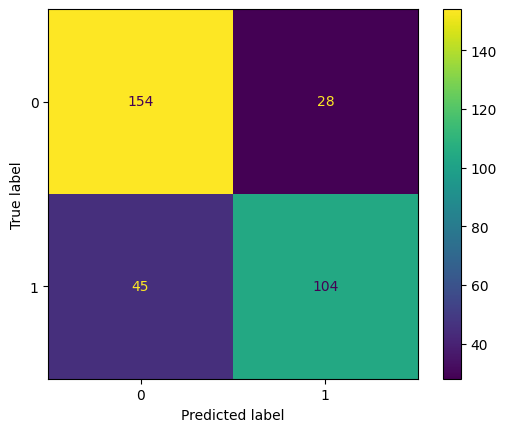

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=3, min_samples_split=10, random_state=0)
rf.fit(X_train, y_train)

performance_metrics(rf, X_train, y_train, 'RandomForestClassifier - Train') # evidence of overfitting

------------------- RandomForestClassifier - Test -------------------
------------------- CLASSIFICATION REPORT -------------------
              precision    recall  f1-score   support

           0       0.78      0.83      0.81        48
           1       0.75      0.69      0.72        35

    accuracy                           0.77        83
   macro avg       0.77      0.76      0.76        83
weighted avg       0.77      0.77      0.77        83

AUROC: 0.780952380952381
------------------- CONFUSION MATRIX -------------------


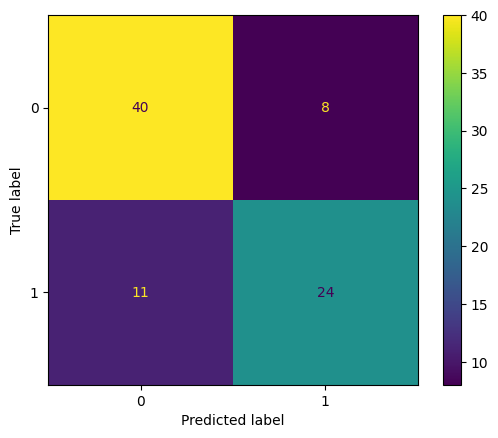

In [20]:
performance_metrics(rf, X_test, y_test, 'RandomForestClassifier - Test')

### Neural Network - MultiLayerPerceptron

------------------- MLPClassifier - Train -------------------
------------------- CLASSIFICATION REPORT -------------------
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       182
           1       0.74      0.70      0.72       149

    accuracy                           0.76       331
   macro avg       0.75      0.75      0.75       331
weighted avg       0.75      0.76      0.75       331

AUROC: 0.791798805221624
------------------- CONFUSION MATRIX -------------------


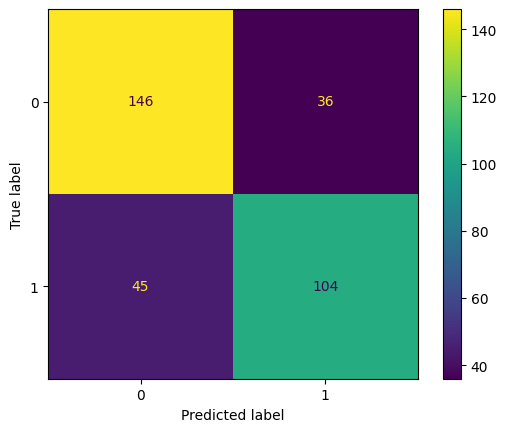

In [21]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    (6, 5, 3), 
    activation='tanh', 
    solver='adam', 
    learning_rate='adaptive', 
    max_iter=1000,
    batch_size=8)
mlp.fit(X_train, y_train)

performance_metrics(mlp, X_train, y_train, 'MLPClassifier - Train') 

------------------- RandomForestClassifier - Test -------------------
------------------- CLASSIFICATION REPORT -------------------
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        48
           1       0.74      0.71      0.72        35

    accuracy                           0.77        83
   macro avg       0.77      0.76      0.76        83
weighted avg       0.77      0.77      0.77        83

AUROC: 0.8333333333333334
------------------- CONFUSION MATRIX -------------------


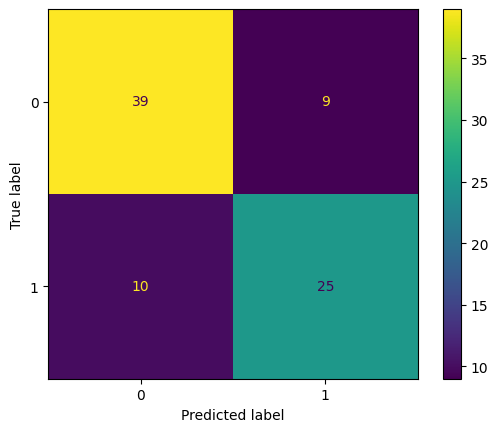

In [22]:
performance_metrics(mlp, X_test, y_test, 'RandomForestClassifier - Test')

## GridSearchCV

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'activation' : ['logistic', 'tanh', 'relu'],
    'batch_size' : np.arange(8, 64, 8),
    'max_iter': [1000, 2000, 3000]
}

base_estimator = MLPClassifier((6, 4, 3, 1), solver = 'adam', learning_rate = 'adaptive', random_state=0)

sh = GridSearchCV(
    base_estimator, 
    param_grid, 
    cv = 5,
    verbose = 3,
    n_jobs = 3).fit(X, y)

best_model = sh.best_estimator_
best_model.fit(X_train, y_train)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


MLPClassifier(activation='tanh', batch_size=24, hidden_layer_sizes=(6, 4, 3, 1),
              learning_rate='adaptive', max_iter=1000, random_state=0)

------------------- GridSearchBest - Train -------------------
------------------- CLASSIFICATION REPORT -------------------
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       182
           1       0.72      0.67      0.70       149

    accuracy                           0.74       331
   macro avg       0.74      0.73      0.73       331
weighted avg       0.74      0.74      0.74       331

AUROC: 0.8058116380264031
------------------- CONFUSION MATRIX -------------------


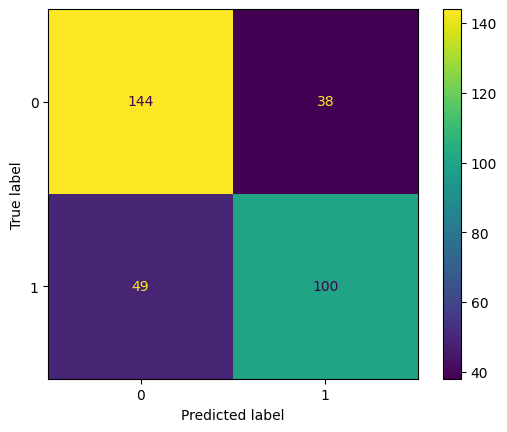

In [24]:
performance_metrics(best_model, X_train, y_train, 'GridSearchBest - Train') # evidence of overfitting

------------------- GridSearchBest - Test -------------------
------------------- CLASSIFICATION REPORT -------------------
              precision    recall  f1-score   support

           0       0.78      0.81      0.80        48
           1       0.73      0.69      0.71        35

    accuracy                           0.76        83
   macro avg       0.75      0.75      0.75        83
weighted avg       0.76      0.76      0.76        83

AUROC: 0.8178571428571428
------------------- CONFUSION MATRIX -------------------


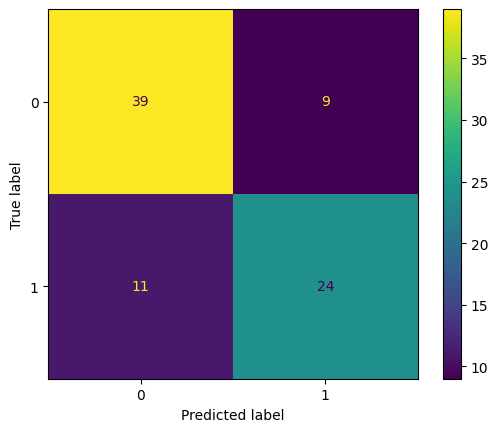

In [25]:
performance_metrics(best_model, X_test, y_test, 'GridSearchBest - Test')

## Perdict on unseen - Submission

In [26]:
X_test_unseen = test_df.drop('ph', axis = 1)
X_test_unseen = norm.transform(X_test_unseen)

y_test_unseen_pred = best_model.predict_proba(X_test_unseen)

In [27]:
y_test_unseen_pred[:, 1]

array([0.17037073, 0.41689482, 0.83631691, 0.49630195, 0.35268852,
       0.62235898, 0.55438995, 0.80771347, 0.1241688 , 0.1318871 ,
       0.34916305, 0.14472768, 0.76474265, 0.3801487 , 0.14428612,
       0.22814166, 0.83248515, 0.36242783, 0.36157859, 0.12671903,
       0.3119098 , 0.3217764 , 0.368061  , 0.78042569, 0.80359134,
       0.35480375, 0.42287812, 0.13196276, 0.18049271, 0.8261451 ,
       0.80929124, 0.57990837, 0.53350018, 0.80790378, 0.60151928,
       0.38810013, 0.77579475, 0.61185896, 0.19582475, 0.39485914,
       0.44380318, 0.59422188, 0.78216045, 0.42363575, 0.8081945 ,
       0.25210222, 0.7672782 , 0.40907156, 0.5228246 , 0.13121877,
       0.79924491, 0.81800896, 0.34559778, 0.23575927, 0.36289998,
       0.27588158, 0.55263361, 0.25478701, 0.66691439, 0.44430792,
       0.67816839, 0.16143905, 0.34046875, 0.12571695, 0.13345029,
       0.80622476, 0.1332769 , 0.79326609, 0.38594552, 0.28485143,
       0.27788323, 0.51419688, 0.368061  , 0.46558341, 0.31651

In [28]:
from datetime import datetime

now = datetime.now().strftime("%Y%m%d_%H%M%S")

output = pd.read_csv(data_path + "sample_submission.csv", index_col=0)

output['target'] = y_test_unseen_pred[:, 1]

output.to_csv(f"../data/output/test_predicted_{now}.csv", header=True, index=True)